# Logistic Regression

## Credit Card Fraud Detection

### Description: This dataset contains information about credit card transactions made by European cardholders in September 2013. It includes 28 PCA-transformed features, 'Time', and 'Amount'. It can be used to predict the variable 'Class' for fraud (1) or non-fraud (0) based on these features using logistic regression.

## Perform Logistic Regression using the selected categorical dependent variable.

## Part 1 - Data Preprocessing: Encode categorical variables, balance classes if needed.

### Importing the dataset

In [101]:
import pandas as pd
dataset = pd.read_csv('CreditcardDataset.csv')

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [103]:
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Getting the inputs and output

In [104]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1]

In [105]:
X

array([[-1.35980713e+00, -7.27811730e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530530e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309900e-03,  1.47241690e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477200e-03, -2.65608290e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530900e-03,  1.36489140e-02,  2.17000000e+02]])

In [106]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### Creating the Training Set and the Test Set

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [108]:
X_train


array([[-1.11504743e+00,  1.03558276e+00,  8.00712441e-01, ...,
         2.29736936e-01, -7.05913040e-02,  1.29500000e+01],
       [ 1.22847256e+00, -1.38826483e-01,  4.73795287e-01, ...,
        -6.91781060e-02,  1.89006100e-03,  2.55700000e+01],
       [ 1.92614789e+00, -1.98627962e-01, -2.86726817e-01, ...,
         5.27473010e-02, -3.26215510e-02,  6.90000000e+00],
       ...,
       [ 1.51260229e+00, -9.49435315e-01, -2.19061626e-01, ...,
        -1.41537100e-03,  3.66494400e-03,  3.49000000e+01],
       [ 1.79886333e+00, -1.69979073e+00, -1.42182189e-01, ...,
        -3.36155800e-02, -3.24705130e-02,  1.71310000e+02],
       [-5.89399721e-01,  7.47828393e-01,  1.78478144e+00, ...,
         8.65917860e-02,  1.18083774e-01,  1.59900000e+01]])

In [109]:
X_test

array([[-3.23333572e-01,  1.05745525e+00, -4.83411520e-02, ...,
         1.08494430e-01,  1.61139167e-01,  4.00000000e+01],
       [-3.49718405e-01,  9.32618570e-01,  1.42992038e-01, ...,
         7.68300270e-02,  1.75561960e-01,  1.98000000e+00],
       [-1.61471082e+00, -2.40656973e+00,  3.26193929e-01, ...,
         2.86285101e-01,  4.37321868e-01,  9.60000000e+01],
       ...,
       [ 1.12540205e+00, -2.28899827e+00, -3.12378463e+00, ...,
        -2.40867448e-01, -7.49435200e-03,  5.83210000e+02],
       [ 2.06485724e+00,  2.85198054e-01, -2.48731107e+00, ...,
        -1.03162057e-01, -6.17434560e-02,  2.95000000e+00],
       [ 2.35138178e+00, -1.32522606e+00, -1.33921956e+00, ...,
         7.26919800e-03, -5.16343390e-02,  1.50000000e+01]])

In [110]:
y_train

68806     0
40018     0
250360    0
234820    0
10001     0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: Class, Length: 227845, dtype: int64

In [111]:
y_test

183484    0
255448    0
244749    0
63919     0
11475     0
         ..
236778    0
127073    0
208502    0
263323    0
246221    0
Name: Class, Length: 56962, dtype: int64

### Feature Scaling

In [112]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [113]:

X_train

array([[-0.57177938,  0.62828369,  0.52947541, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [ 0.62679248, -0.08362249,  0.31369588, ..., -0.17091545,
         0.00631403, -0.25423683],
       [ 0.98361214, -0.11987309, -0.18828177, ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [ 0.77210803, -0.57499928, -0.1436198 , ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.91851362, -1.02985151, -0.09287603, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.30294167,  0.45385207,  1.17900373, ...,  0.21715744,
         0.36857129, -0.29286006]])

## Part 2 - Model Implementation: Use appropriate libraries.

### Building the model

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)


### Training the model

In [115]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [116]:
y_pred = model.predict(sc.transform(X_test))

In [117]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
y_test

183484    0
255448    0
244749    0
63919     0
11475     0
         ..
236778    0
127073    0
208502    0
263323    0
246221    0
Name: Class, Length: 56962, dtype: int64

Making the prediction of a single data point with:

1. Time = 0
2. V1 = -1.359807134
3. V2 = -0.072781173
4. V3 = 2.536346738
5. V4 = 1.378155224
6. V5 = -0.33832077
7. V6 = 0.462387778
8. V7 = 0.239598554
9. V8 = 0.098697901
10. V9 = 0.36378697
11. V10 = 0.090794172
12. V11 = -0.551599533
13. V12 = -0.617800856
14. V13 = -0.991389847
15. V14 = -0.311169354
16. V15 = 1.468176972
17. V16 = -0.470400525
18. V17 = 0.207971242
19. V18 = 0.02579058
20. V19 = 0.40399296
21. V20 = 0.251412098
22. V21 = -0.018306778
23. V22 = 0.277837576
24. V23 = -0.11047391
25. V24 = 0.066928075
26. V25 = 0.128539358
27. V26 = -0.189114844
28. V27 = 0.133558377
29. V28 = -0.021053053
30. Amount = 149.62

In [119]:
model.predict(sc.transform([[-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,0.207971242,0.02579058,0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62]]))

array([0])

## Part 3: Evaluation Metrics: Calculate Accuracy

### Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[56852,     9],
       [   38,    63]])

### Accuracy

 TP = True Positives,
 TN = True Negatives,
 FP = False Positive,
 FN = False Negative,

In [152]:
(56849+81)/(56849+81+12+20) # The formula for Accuracy is (TN+TP)/(TN+TP+FP+FN)

0.9994382219725431

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9991748885221726

## Part 4: Visualization: Plot confusion matrices

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


### Plotting the Confussion Matrices

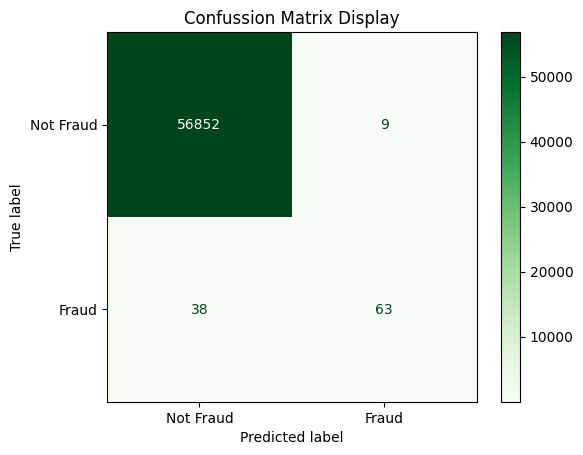

In [124]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Not Fraud', 'Fraud']) # Visualize with display labels for each class
disp.plot(cmap=plt.cm.Greens) # Making the Confussion Matix Colored Green
plt.title('Confussion Matrix Display')
plt.show()



## Part 5: Interpretation: Discuss the model's ability to classify and the importance of features.

### Precision

In [153]:
(81)/(81+12) # The formula for Precision is (TP)/(TP+FP)

0.8709677419354839

### Recall

In [154]:
(81)/(81+20) # The formula for Recall is (TP)/(TP+FP)

0.801980198019802

### F1 Score

In [155]:
2 * (0.871 * 0.802)/(0.871 + 0.802) # The formula for F1 Score is 2 * (precision_score * recall_score) / (precision_score + recall_score)

0.835077106993425